# Guia 2

## Ejercicio 4

Encuentre la respuesta al impulso de los sistemas LTI causales descriptos por las siguientes ecuaciones en diferencias y clasifíquelos en función de esta. Utilice condiciones iniciales nulas.

1. $y[n] - y[n-2] = x[n]$
2. $y[n] = x[n] + 0.5x[n-1]$
3. $y[n] - 0.5y[n-1] + 0.25y[n-2] = x[n]$

$$
\begin{align*}
    y[n] - y[n-2] &= x[n]\\
    y[n] &= x[n] + y[n-2]
\end{align*}
$$
$$
\begin{align*}
    y[n] &= x[n] + 0.5x[n-1]
\end{align*}
$$
$$
\begin{align*}
    y[n] - 0.5y[n-1] + 0.25y[n-2] &= x[n]\\
    y[n] &= x[n] + 0.5y[n-1] - 0.25y[n-2]
\end{align*}
$$

<StemContainer object of 3 artists>

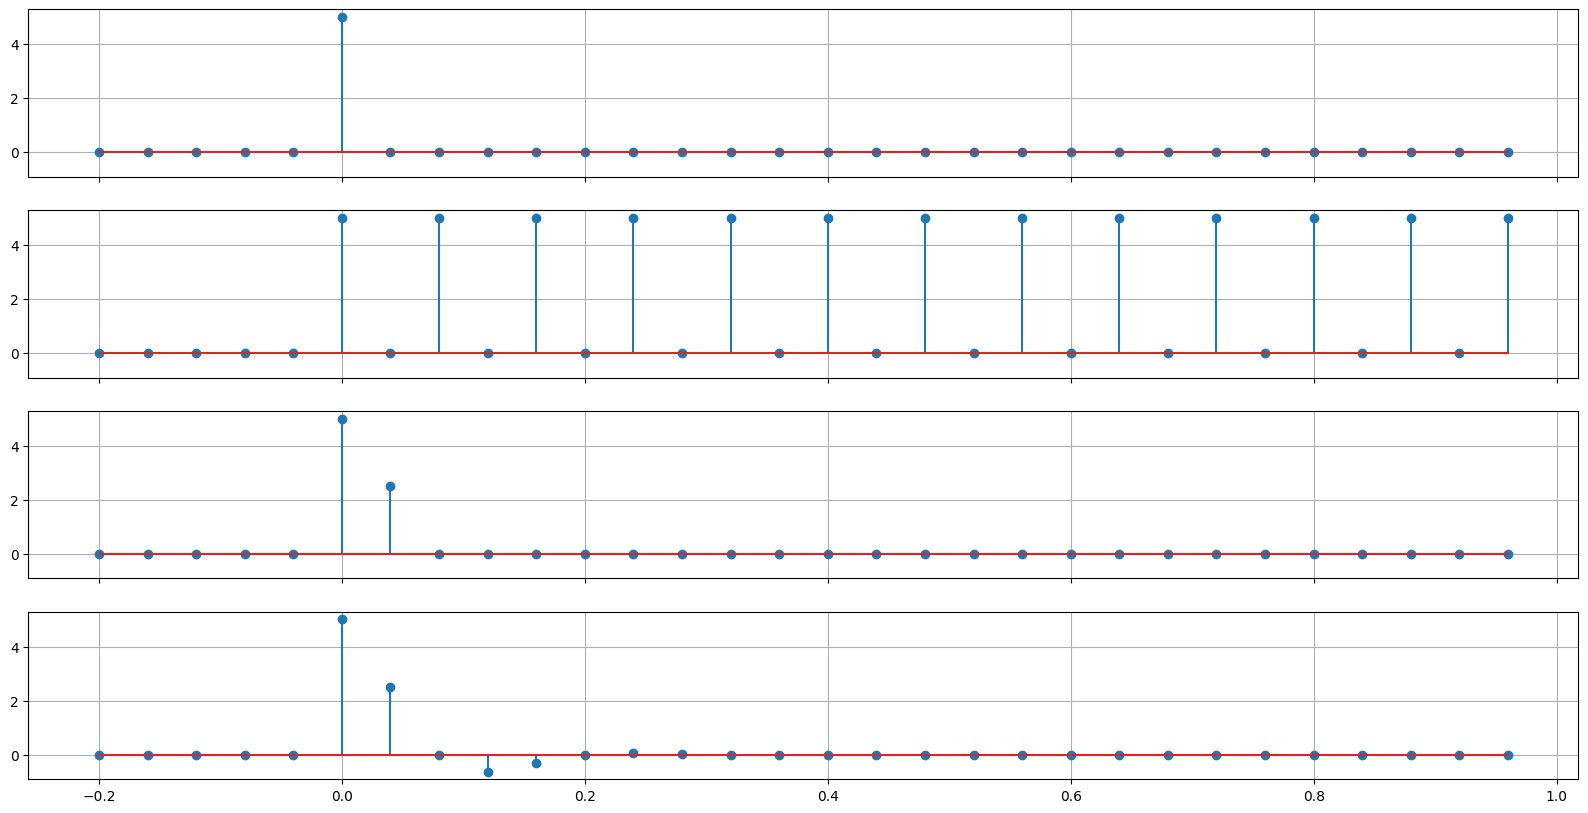

In [1]:
import numpy as np
import matplotlib.pyplot as plt

'''
Impulso de magnitud 1 en t=x
'''
def impulso(tini,tfin,x,fm,A):
    # error si x esta fuera del rango
    if(x < tini or x >= tfin):
        raise Exception(f"x fuera de rango [tini,tfin) \nx={x}\ntini={tini}\ntfin={tfin}")

    t = np.linspace(tini,tfin,int(fm*(tfin-tini)),endpoint=False)
    
    # buscamos el t mas cercano (o igual) a x
    i = np.abs(t - x).argmin()
    x_t = t[i]

    return t, np.multiply(np.equal(t,[x_t]*len(t)),[A]*len(t))

# Parametros
tini = -0.2
tfin = 1
fm = 25
T = 1.0/fm
# entrada (impulso unitario)
t,x = impulso(tini,tfin,0,fm,5)

# salidas
y = [0]*3
y[0] = [0]*len(t)
y[1] = [0]*len(t)
y[2] = [0]*len(t)
# 1
for n in range(2,len(t)):
    y[0][n] = x[n] + y[0][n-2]
# 2
y[1][1:] = x[1:len(x)] + np.divide(x[0:len(x)-1],[2]*(len(x)-1))
# 3
for n in range(2,len(t)):
    y[2][n] = x[n] + 0.5*y[2][n-1] - 0.25*y[2][n-2]

fig, ax = plt.subplots(4, sharex=True, sharey=True)
fig.set_figwidth(20)
fig.set_figheight(10)

for i in range(4):
    ax[i].grid()

ax[0].stem(t,x)
ax[1].stem(t,y[0])
ax[2].stem(t,y[1])
ax[3].stem(t,y[2])